# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata_with_viral.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 76
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts','%ExistingMuts','ExistingMutList','Clade']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#removing the % from the data
Data['%N'] = Data['%N'].str.replace('%', ' ') 
Data['%Muts'] = Data['%Muts'].str.replace('%', ' ') 
Data['%UniqueMuts'] = Data['%UniqueMuts'].str.replace('%', ' ') 
Data['%ExistingMuts'] = Data['%ExistingMuts'].str.replace('%', ' ') 
Data['%N'].astype(float)
Data['%Muts'].astype(float)
Data['%UniqueMuts'].astype(float)
Data['%ExistingMuts'].astype(float)

0      0.04
1      0.05
2      0.13
3      0.03
4      0.03
       ... 
173    0.04
174    0.05
175    0.05
176    0.05
177    0.01
Name: %ExistingMuts, Length: 178, dtype: float64

In [6]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.dropna(subset = ['ExistingMutList'], inplace=True)
Data.index = range(len(Data))

In [7]:
#chacking if there is any null data in ExistingMutList
for i in range(len(Data)):
    if pd.isnull(Data.ExistingMutList[i]) is True:
        print('True')

In [8]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

In [9]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['ExistingMutList']]),pd.get_dummies(Data[['Clade']]), Data[['status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts']]], axis=1)
Data_model.head()

,"ExistingMutList_(NS3_A23V,NS3_G251V)",ExistingMutList_(NS3_G251V),ExistingMutList_(NS8_L84S),ExistingMutList_(NSP12_P323L),"ExistingMutList_(NSP12_P323L,NS8_L84S)","ExistingMutList_(NSP12_P323L,NSP12_A185V,Spike_D614G)","ExistingMutList_(NSP12_P323L,NSP12_A449V,Spike_D614G,N_G204R,N_R203K)","ExistingMutList_(NSP12_P323L,NSP12_T252N,Spike_D614G)","ExistingMutList_(NSP12_P323L,NSP12_T26I,Spike_D614G,M_D3G)","ExistingMutList_(NSP12_P323L,NSP12_V880I,Spike_D614G,Spike_E583D,NS3_Q57H,N_S194L)",...,Clade_G,Clade_Other,Clade_S,Clade_V,status,%N,Length(nt),Length(aa),%Muts,%UniqueMuts
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29890.0,9710.0,0.04,0.00
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29849.0,9710.0,0.05,0.00
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2.41,29899.0,9685.0,0.19,0.05
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29845.0,9710.0,0.04,0.01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29834.0,9710.0,0.03,0.00


In [11]:
#checking the balance in the data
Data_model['status'].value_counts()

0    137
1     32
Name: status, dtype: int64

In [12]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    137
1     32
Name: status, dtype: int64

In [13]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

### Kernel PCA diemnsion reduction

#### from sklearn.decomposition import PCA, KernelPCA
kpca = KernelPCA(kernel="rbf")
kpca.fit(X_train)
#X_back = kpca.inverse_transform(X_kpca)
X_train = kpca.transform(X_train)
X_test = kpca.transform(X_test)

### Balancing the data

In [14]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

### Scaling the data

In [15]:
# Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Random Forest

In [16]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=30,max_depth = 60, max_features = 'log2')
# Fit on training data
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
RF_probs = model.predict_proba(X_test)[:,1]
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))

R^2 _train= 0.9908256880733946
R^2 _test= 0.9411764705882353


### Cross validation 

In [17]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

Cross-Validation Accuracy Scores [0.95454545 0.95454545 1.         0.90909091 0.95454545 0.95454545
 1.         1.         0.95238095 0.9047619 ]
CV-scores_min =  0.9047619047619048
CV_scores_mean = 0.9584415584415586
CV_scores_max = 1.0


In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
113,1,0
1,0,0
91,0,0
77,1,1
28,0,0
51,0,0
153,1,1
127,0,0
95,0,0
151,1,1


### Performance measurement metrics

In [19]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.058823529411764705
Mean Squared Error: 0.058823529411764705
Root Mean Squared Error: 0.24253562503633297


In [20]:
from sklearn.metrics import precision_recall_curve
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

In [21]:
from sklearn.metrics import f1_score
# calculate F1 score
f1 = f1_score(y_test, y_hat)
print('f1 score =', f1)

f1 score = 0.8


In [22]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
print( 'roc_auc =', roc_auc_score(y_test, RF_probs) )

roc_auc = 0.9523809523809523


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.952


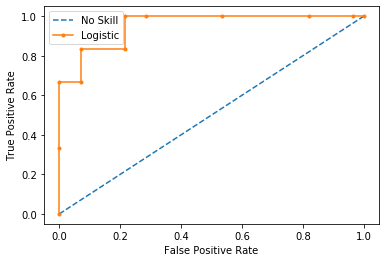

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (RF_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.800 auc=0.952


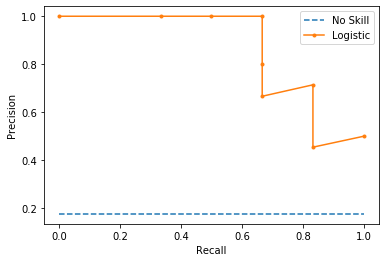

In [24]:
from sklearn.metrics import auc
RF_precision, RF_recall, _ = precision_recall_curve(y_test, RF_probs)
RF_f1, lr_auc = f1_score(y_test, y_hat), auc(RF_recall, RF_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (RF_f1, RF_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(RF_recall, RF_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()